# Emotions Detection in Text

In [2]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
# Load Dataset
df = pd.read_csv('../data//tweet_emotions.csv', usecols=['sentiment', 'content'])


In [7]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [9]:
df = df.rename(columns={'content': 'Text', 'sentiment': 'Emotion'})


,Emotion,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [10]:
# Value Counts
df['Emotion'].value_counts()

Emotion
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

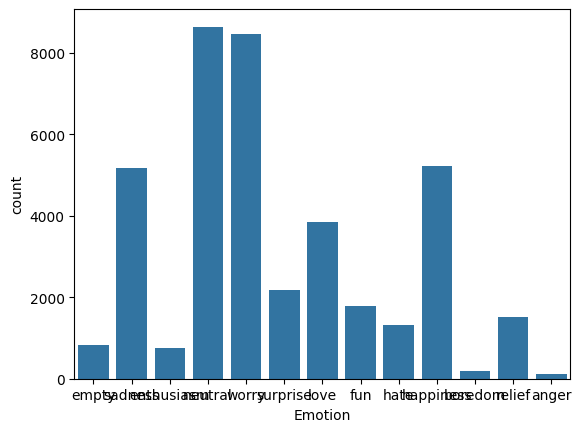

In [11]:
# Plot
sns.countplot(x='Emotion',data=df)

In [12]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [16]:
df

,Emotion,Text,Clean_Text
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...
39995,neutral,@JohnLloydTaylor,
39996,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [17]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [18]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [19]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [20]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.33425

In [24]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [25]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [26]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.33621701e-03, 2.87446647e-03, 2.63768558e-04, 5.53453968e-03,
        3.33534072e-03, 6.34263136e-01, 4.68182890e-03, 2.06563312e-01,
        4.72279169e-02, 8.82457154e-03, 3.20879400e-02, 2.60647359e-02,
        2.69422269e-02]])

In [27]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [28]:
# Save Model & Pipeline
import joblib
pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()